## Important Info: Estimate the verification accuracy of DAC
- Used DAC (plain) data to train an NN model
- There are 193 different user's profiles and each profiles has 1000 data samples (normalized data)
- Each data semple has 65 different features 
- NN has 4 dense layers along with 'BatchNormalization' and 'relu' activation funcation
- Last layer is softmax function (193 classes)
- Included a summary of the NN architecture
- For 50 rounds of training training accurach reached to 95.68% and validation accuracy reached to 96.98%
- Included a graph that shows change of training and validation acccruacy in different ephocs
- Test accruacy 96.91

In [1]:
#Read all data [0-192: 193 users' oversampled data]
import csv
import pandas as pd
dataset=pd.read_csv('Dataset/OversampledDACData.csv',index_col=0)
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,57,58,59,60,61,62,63,64,65,Label
0,0.178862,0.316667,0.251082,0.144628,0.366255,0.323770,0.065844,0.020243,0.032129,0.060729,...,0.732435,0.736285,0.734870,0.707042,0.131098,0.196,1.0,0.279070,0.016393,0
1,0.166667,0.108333,0.069264,0.074380,0.246914,0.327869,0.213992,0.198381,0.116466,0.085020,...,0.670837,0.671800,0.670509,0.651643,0.170732,0.156,0.0,0.209302,0.234973,0
2,0.162602,0.112500,0.510823,0.280992,0.213992,0.040984,0.086420,0.052632,0.184739,0.259109,...,0.651588,0.651588,0.657061,0.642254,0.320122,0.124,0.0,0.186047,0.327869,0
3,0.085366,0.045833,0.025974,0.045455,0.181070,0.090164,0.045267,0.194332,0.188755,0.323887,...,0.641963,0.641963,0.645533,0.635681,0.204268,0.080,1.0,0.325581,0.054645,0
4,0.512195,0.295833,0.220779,0.247934,0.378601,0.069672,0.600823,0.785425,0.465863,0.477733,...,0.727623,0.732435,0.731028,0.694836,0.173780,0.504,0.0,0.255814,0.245902,0


In [2]:
dataset.shape

(57940, 66)

In [3]:
#replace the user ID by class name and count the number of sample in each class
#dataset['Label'] = pd.factorize(dataset['Label'])[0]
dataset.groupby(['Label'])['Label'].count()

Label
0      300
1      300
2      300
3      300
4      300
      ... 
188    300
189    300
190    300
191    300
192    300
Name: Label, Length: 193, dtype: int64

In [4]:
#seperate the profile in two groups (80.0%, 20.0%): (i) Training profile (0-155), and (ii) auxiliary profile (156-192)
totalUser= len(pd.unique(dataset['Label']))
trainingData = dataset[dataset['Label'] <155]
auxilaryData = dataset[dataset['Label'] >= 155]
print("Total user in training dataset:", len(pd.unique(trainingData['Label'])))
print("Total user in auxiliary dataset:", len(pd.unique(auxilaryData['Label'])))

Total user in training dataset: 155
Total user in auxiliary dataset: 38


In [5]:
#Prepare the traning data for training and testing the model
import tensorflow
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X=trainingData.drop(columns=['Label'])
y=trainingData['Label']

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=22)
#Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=22)

ytrain = to_categorical(ytrain)
yval = to_categorical(yval)
#ytest = to_categorical(ytest)

In [6]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xval.shape)
print(yval.shape)
#print(Xtest.shape)
#print(ytest.shape)

(37232, 65)
(37232, 155)
(9308, 65)
(9308, 155)


In [7]:
# import all necessary package for a neural network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inlineimport keras
from keras.layers import Dense, Dropout, Input,Activation,Dropout, Flatten
from keras.models import Model,Sequential
from keras.datasets import mnist
#from tqdm import tqdm
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.optimizers import Adam
#import torch.nn.functional as F

In [8]:
#define optimizers for neural network
from keras.optimizers import SGD, RMSprop, Adam
def adam_optimizer():
    return Adam(learning_rate=0.0002, beta_1=0.5)

def RMSprop_optimizer():
    return RMSprop(learning_rate=0.001, rho=0.9)

In [9]:
#neural network architecture for model training

def create_classifier(release=False,totalClass=155):
  classifier = Sequential()
  classifier.add(Dense(128, input_dim=65))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.01))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(256))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.01))
 
  classifier.add(Dense(512))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  #classifier.add(Dropout(0.01))
  
  #classifier.add(Dense(512))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))
  #classifier.add(Dropout(0.01))


  classifier.add(Dense(256))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.01))


  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.01))

  #if release:
  classifier.add(Dense(totalClass, activation='softmax'))
  #else:
  #   classifier.add(Dense(Tuser))
  #np.log_softmax_v2(a, axis=axis)
  #classifier.add(F.softmax(a, dim=1))

  classifier.compile(loss='categorical_crossentropy', optimizer=RMSprop_optimizer(),metrics=['accuracy'])
  return classifier

Clasf=create_classifier()
Clasf.summary()

C:\Users\mdmor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 155)            │        19,995 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362,395 (1.38 MB)

 Trainable params: 359,835 (1.37 MB)

 Non-trainable params: 2,560 (10.00 KB)

In [10]:
#Train the classifier seperately for black-box attack
import keras

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

Classfier2= create_classifier(True,155)

#------Comment will start from here
lossc='categorical_crossentropy'
optimizerc=RMSprop(learning_rate=0.001, rho=0.9)
Classfier2.compile(loss=lossc, optimizer=optimizerc,metrics=['accuracy'])
#------Comments will end from here
historyc2 =  Classfier2.fit(Xtrain, ytrain, batch_size=64, epochs=50, validation_data=(Xval, yval),verbose=1)

Epoch 1/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4466 - loss: 2.3556 - val_accuracy: 0.6989 - val_loss: 0.8298
Epoch 2/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6896 - loss: 0.8821 - val_accuracy: 0.7264 - val_loss: 0.7331
Epoch 3/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7324 - loss: 0.7301 - val_accuracy: 0.7373 - val_loss: 0.7005
Epoch 4/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7614 - loss: 0.6423 - val_accuracy: 0.7958 - val_loss: 0.5348
Epoch 5/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7848 - loss: 0.5789 - val_accuracy: 0.8333 - val_loss: 0.4503
Epoch 6/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8005 - loss: 0.5337 - val_accuracy: 0.7338 - val_loss: 0.7983
Epoch 7/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8167 - loss: 0.4835 - val_accuracy: 0.8440 - val_loss: 0.4015
Epoch 8/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8241 - loss: 0.4635 - val_accura

Text(0.5, 0, 'epochs')

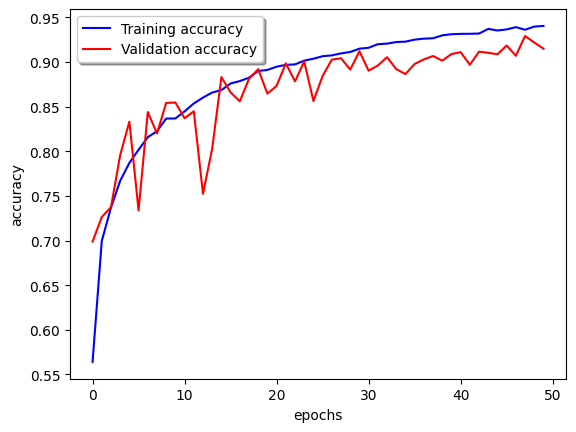

In [11]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(historyc2.history['accuracy'], color='b', label="Training accuracy")
plt.plot(historyc2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [12]:
#valid test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/DACDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] < 155]
Xtest=testdataset.drop(columns=['Label'])
ytest=testdataset['Label']
ytest = to_categorical(ytest)

testdataset.head()
#Xtest.head()

,Label,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
3799,27,0.024390,0.095833,0.259740,0.157025,0.209877,0.135246,0.234568,0.093117,0.132530,...,0.951830,0.950914,0.950914,0.949087,0.927700,0.128049,0.272,0.0,0.046512,0.076503
18582,138,0.008130,0.054167,0.090909,0.111570,0.061728,0.118852,0.119342,0.028340,0.016064,...,0.618497,0.617902,0.617902,0.616715,0.602817,0.082317,0.180,0.0,0.534884,0.010929
6423,47,0.073171,0.333333,0.229437,0.161157,0.131687,0.413934,0.604938,0.267206,0.188755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.152439,0.672,1.0,0.395349,0.398907
6892,51,0.077236,0.254167,0.056277,0.033058,0.032922,0.106557,0.016461,0.072874,0.148594,...,0.383430,0.383061,0.382098,0.379443,0.366197,0.054878,0.184,0.0,0.279070,0.038251
2885,21,0.105691,0.304167,0.346320,0.458678,0.452675,0.262295,0.106996,0.129555,0.120482,...,0.222543,0.218479,0.218479,0.218060,0.212207,0.564024,0.096,1.0,0.116279,0.098361


In [13]:
#Performance of the classifier
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9443 - loss: 0.1536
Loss: 0.17075558006763458
Accuracy: 0.9407910704612732


In [14]:
#invalid test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/DACDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] >= 155]
Xtest=testdataset.drop(columns=['Label'])
ytest = np.random.randint(0, 155, size=Xtest.shape[0])
ytest = pd.DataFrame(ytest, columns=['random_numbers'])
#ytest=testdataset['Label']
print(type(ytest))
ytest = to_categorical(ytest)

#testdataset.head()
#Xtest.head()

<class 'pandas.core.frame.DataFrame'>


In [15]:
#Performance of the classifier for valid test data
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0077 - loss: 25.3899     
Loss: 25.49910545349121
Accuracy: 0.006979062687605619
